In [33]:
#File: crossValidation.ipynb
#Purpose: use cross validation to evaluate the model
#Author: Quan Gan
import fasttext
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#Method: trainModel
#Purpose: train fastText model
#Paremater: trainSet -> the trainSet file path
#           input_word_vector -> the pretrained word vector file path
def trainModel(trainSet, input_word_vector):
    model = fasttext.train_supervised(input = trainSet,
                                      dim = 300,
                                      lr = 0.5,
                                      epoch = 20,
                                      loss ='ova',
                                      pretrainedVectors = input_word_vector)
    return model

In [3]:
from sklearn.model_selection import KFold

In [4]:
#Method: cross_Validation
#Purpose: use cross validation to evaluate the result
#Parameter: df -> the input data
#           NFold -> number of fold
def cross_Validation(df, NFold):
    kfold = KFold(n_splits=NFold, shuffle=True, random_state=1)
    precision = 0
    recall = 0
    for train, test in kfold.split(df):
        df.iloc[train].to_csv('train.train', header=False, index=False)
        df.iloc[test].to_csv('test.valid', header=False, index=False)
   
        model = trainModel('train.train', '../data/crawl-300d-2M-subword.vec')
        result = model.test('test.valid', k=1)

        precision += result[1]
        recall += result[2]
        os.remove('test.valid')
        os.remove('train.train')
    print("{} fold Cross Validation".format(NFold))
    print("Precision:", round(precision/NFold, 4))
    print("Recall:", round(recall/NFold,4))
    return round(precision/NFold, 4), round(recall/NFold,4)

In [5]:
df = pd.read_csv('../data/cleanedData.txt', header= None)

In [35]:
result = pd.DataFrame(columns=['amount', 'Precision@1', 'Recall@1'])

count = 100
while count <= len(df):
    current = df.sample(n = count, random_state=1)
    precision, recall = cross_Validation(current, 5)
    result = pd.concat([result, pd.DataFrame([[count, precision, recall]], columns=['amount', 'Precision@1', 'Recall@1'])], ignore_index=True)
    if len(df) - count == 0:
        break
    count += min(100, len(df)-count)

5 fold Cross Validation
Precision: 0.8795
Recall: 0.8303
5 fold Cross Validation
Precision: 0.865
Recall: 0.8326


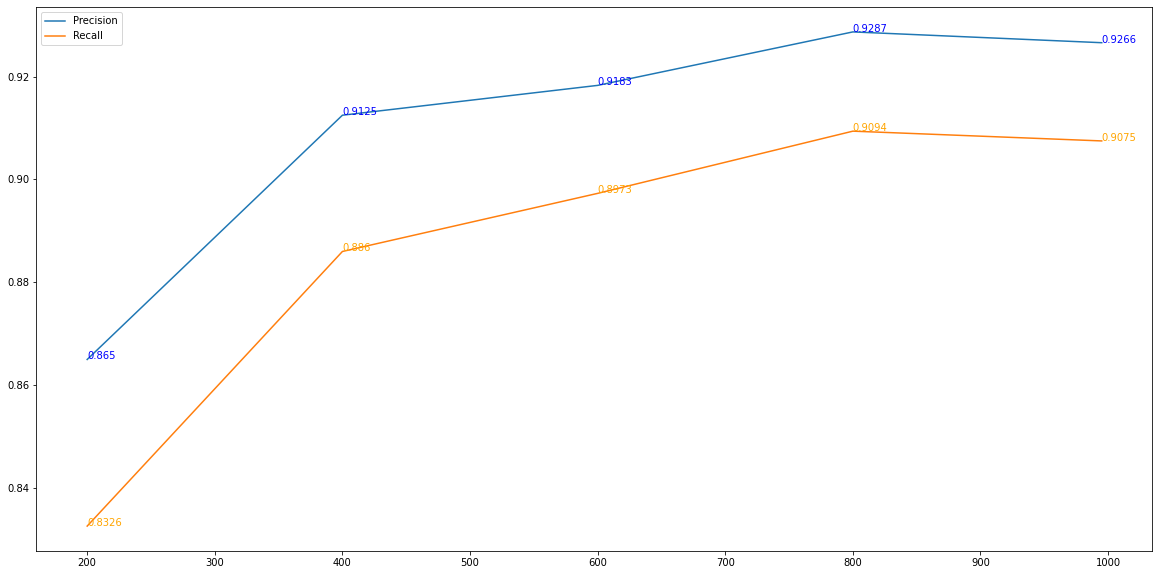

In [34]:
fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot()

p = ax.plot(result['amount'], result['Precision@1'], label='Precision')
r = ax.plot(result['amount'], result['Recall@1'], label='Recall')

for i, rect in enumerate(result.index):
    ax.text(result['amount'][i], result['Precision@1'][rect],  result['Precision@1'][rect], color='blue')

for j, rect1 in enumerate(result.index):
    ax.text(result['amount'][j], result['Recall@1'][rect1],  result['Recall@1'][rect1], color='orange')
plt.legend()
plt.xlabel('Record counts')
plt.ylabel('Scores')
plt.title('Smithsonian/fastText performance 995 records')